# Libraries

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

# DataSet

In [103]:
customer = pd.read_csv(r"Customer Acqusition.csv")
repayment = pd.read_csv(r"Repayment.csv")
spending = pd.read_csv(r"spend.csv")

# EDA

In [104]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        100 non-null    int64  
 1   Customer  100 non-null    object 
 2   Age       100 non-null    int64  
 3   City      100 non-null    object 
 4   Product   100 non-null    object 
 5   Limit     100 non-null    float64
 6   Company   100 non-null    object 
 7   Segment   100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [105]:
repayment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SL No:      1499 non-null   float64
 1   Customer    1500 non-null   object 
 2   Month       1500 non-null   object 
 3   Amount      1500 non-null   float64
 4   Unnamed: 4  0 non-null      float64
dtypes: float64(3), object(2)
memory usage: 59.6+ KB


In [106]:
spending.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sl No:    1500 non-null   int64  
 1   Customer  1500 non-null   object 
 2   Month     1500 non-null   object 
 3   Type      1500 non-null   object 
 4   Amount    1500 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 58.7+ KB


In [107]:
repayment.isnull().sum()

SL No:          24
Customer        23
Month           23
Amount          23
Unnamed: 4    1523
dtype: int64

In [108]:
repayment.drop(repayment.columns[[4]],axis=1,inplace=True)

In [109]:
repayment.dropna(inplace=True)

In [110]:
repayment.info

<bound method DataFrame.info of       SL No: Customer      Month     Amount
1        2.0       A1   3-Jan-04  245899.02
2        3.0       A1  15-Jan-04  259490.06
3        4.0       A1  25-Jan-04  437555.12
4        5.0       A1  17-Jan-05  165972.88
5        6.0       A1  23-Feb-05  365366.62
...      ...      ...        ...        ...
1495  1496.0      A67   9-May-05   55638.77
1496  1497.0      A68  10-May-06  319836.49
1497  1498.0      A69  11-Jul-06  247628.45
1498  1499.0      A70  12-Aug-05  454016.51
1499  1500.0      A71  13-Sep-04   56286.33

[1499 rows x 4 columns]>

In [111]:
spending.isnull().sum()

Sl No:      0
Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In [112]:
customer.isnull().sum()

No          0
Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [113]:
# 1

a. In case age is less than 18, replace it with mean of age values.

In [114]:
customer["Age"].mean()

46.49

In [115]:
customer.loc[customer["Age"] < 18,"Age"] = customer["Age"].mean()

In [116]:
customer["Age"].mean()
round(customer["Age"].mean(),2)

48.4

b.In case spend amount is more than the limit, replace it with 50% of that customer’s limit.
(customer’s limit provided in acquisition table is the per transaction limit on his card)

In [117]:
#merging customer and spend
customer_spend = pd.merge(left=customer,right=spend,on="Customer",how="inner")
customer_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Monthly,Yearly
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,January,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,January,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,January,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,January,2004
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,January,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,2004-01-25,BIKE,54729.66,January,2004
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,2004-01-12,AUTO,139018.26,January,2004
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,2004-01-03,SHOPPING,284521.06,January,2004
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,2004-01-15,AIR TICKET,90184.22,January,2004


In [118]:
customer_spend.loc[customer_spend["Amount"] > customer_spend["Limit"],"Amount"] = (50 * customer_spend["Limit"]).div(100)

In [119]:
customer_spend[customer_spend["Amount"] > customer_spend['Limit']]

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Monthly,Yearly


c. Incase the repayment amount is more than the limit, replace the repayment with the
limit.

In [120]:
#merging customer and repay
customer_repay = pd.merge(left=repay,right=customer,on="Customer",how="inner")
customer_repay

,SL No:,Customer,Month,Amount,Unnamed: 4,No,Age,City,Product,Limit,Company,Segment
0,NaN,A1,12-Jan-04,495414.75,NaN,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2.0,A1,3-Jan-04,245899.02,NaN,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,3.0,A1,15-Jan-04,259490.06,NaN,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,4.0,A1,25-Jan-04,437555.12,NaN,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,5.0,A1,17-Jan-05,165972.88,NaN,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,277.0,A7,22-Nov-05,55108.71,NaN,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1496,295.0,A7,3-Dec-05,429700.12,NaN,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1497,313.0,A7,23-Feb-05,344628.72,NaN,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1498,331.0,A7,31-Mar-06,336264.37,NaN,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC


In [121]:
customer_repay["Amount"] > customer_repay["Limit"]

0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496     True
1497     True
1498     True
1499     True
Length: 1500, dtype: bool

In [122]:
customer_repay.loc[customer_repay["Amount"] > customer_repay["Limit"],"Amount"] = customer_repay["Limit"]

In [123]:
customer_repay[customer_repay["Amount"] > customer_repay["Limit"]]

,SL No:,Customer,Month,Amount,Unnamed: 4,No,Age,City,Product,Limit,Company,Segment


# 2. From the above dataset create the following summaries:

a. How many distinct customers exist?

In [124]:
distinct_customers = customer["Customer"].nunique()
distinct_customers

100

b. How many distinct categories exist?

In [125]:
customer["Segment"].value_counts().count()

5

c. What is the average monthly spend by customers?

In [126]:
spending

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...
1495,1496,A67,4-Feb-06,BUS TICKET,356872.73
1496,1497,A68,25-Mar-06,BUS TICKET,204971.10
1497,1498,A69,31-Mar-06,BUS TICKET,50449.44
1498,1499,A70,23-Mar-06,BUS TICKET,80593.94


In [127]:
spending['Month'] = pd.to_datetime(spending['Month'])
spending['Monthly'] = spending['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
spending['Yearly'] = spending['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))
months_spend= spend.groupby(['Yearly','Monthly']).mean()
months_spend

Sl No:         Amount
Yearly Monthly                             
2004   April      730.500000  235272.037143
       February   749.500000  221215.270000
       January    751.622150  251712.068664
       March      725.500000  232146.119286
       May        733.500000  217539.236429
       November   745.500000  270486.397857
       September  741.500000  310923.383571
2005   April      730.000000  252181.326429
       August     749.500000  233734.634286
       December   762.500000  147503.060000
       February   750.666667  229802.279821
       January    746.500000  292741.372857
       July       757.500000  229116.663571
       June       755.500000  262688.112857
       May        747.300000  245696.515429
       November   749.500000  286143.322857
       October    760.500000  194568.640714
       September  759.500000  188666.202143
2006   April      744.414894  232468.967553
       August     770.500000  240699.717143
       December   774.500000  270470.980714
       February   757.833333  253858.260714
       January    763.500000  282058.006429
       July       754.500000  287505.098929
       June       768.500000  177252.386429
       March      750.903226  247166.084654
       May        744.250000  236162.740357
       November   758.500000  182841.290000
       October    772.500000  236136.335000
       September  771.500000  158520.090714

d. What is the average monthly repayment by customers?

In [128]:
repayment

,SL No:,Customer,Month,Amount
1,2.0,A1,3-Jan-04,245899.02
2,3.0,A1,15-Jan-04,259490.06
3,4.0,A1,25-Jan-04,437555.12
4,5.0,A1,17-Jan-05,165972.88
5,6.0,A1,23-Feb-05,365366.62
...,...,...,...,...
1495,1496.0,A67,9-May-05,55638.77
1496,1497.0,A68,10-May-06,319836.49
1497,1498.0,A69,11-Jul-06,247628.45
1498,1499.0,A70,12-Aug-05,454016.51


In [129]:
repayment["Month"] = pd.to_datetime(repayment["Month"])

In [130]:
repayment['Monthly'] = repayment['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
repayment['Yearly'] = repayment['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))
monthly_repay= repayment.groupby(['Yearly','Monthly']).mean()
monthly_repay

SL No:         Amount
Yearly Monthly                             
2004   April      805.066667  259141.679000
       February   764.333333  256702.630741
       January    746.659498  242586.692437
       March      800.066667  252585.280667
       May        760.800000  226162.720800
       November   744.933333  209592.238000
       September  788.375000  184487.848750
2005   April      804.566667  212688.631333
       August     748.054054  264430.921622
       December   710.916667  320379.335833
       February   765.500000  238829.265123
       January    761.333333  240548.098148
       July       705.916667  239871.479167
       June       703.916667  210199.818333
       May        738.077922  263207.367857
       November   733.500000  256695.120000
       October    708.916667  219849.956667
       September  707.916667  247700.170000
2006   April      763.033333  275472.251889
       August     718.916667  224143.992500
       December   722.916667  252736.569167
       February   751.974359  284489.565128
       January    711.916667  293475.389167
       July       750.945946  257936.383243
       June       716.916667  251990.453333
       March      757.004902  240851.266814
       May        757.195402  256920.884943
       November   733.592593  199399.197407
       October    720.916667  260765.480000
       September  719.916667  262533.880833

e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?
(Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment
– Monthly spend. Interest is earned only on positive profits and not on negative amounts)


In [131]:

customer_spend_repay = pd.merge(left=customer_spend,right=repay,on="Customer",how="inner")
customer_spend_repay

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_x,Type,Amount_x,Monthly,Yearly,SL No:,Month_y,Amount_y,Unnamed: 4
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,January,2004,NaN,12-Jan-04,495414.75,NaN
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,January,2004,2.0,3-Jan-04,245899.02,NaN
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,January,2004,3.0,15-Jan-04,259490.06,NaN
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,January,2004,4.0,25-Jan-04,437555.12,NaN
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,January,2004,5.0,17-Jan-05,165972.88,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,2004-01-25,BIKE,54729.66,January,2004,98.0,25-Jan-04,310992.30,NaN
37280,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,2004-01-12,AUTO,5000.00,January,2004,99.0,12-Jan-04,121874.90,NaN
37281,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,2004-01-03,SHOPPING,5000.50,January,2004,100.0,3-Jan-04,337815.57,NaN
37282,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,2004-01-15,AIR TICKET,5001.00,January,2004,101.0,15-Jan-04,25682.73,NaN


In [132]:
interest_group = customer_spend_repay.groupby(["Yearly","Monthly"])['Amount_x','Amount_y'].sum()
interest_group['Monthly Profit'] = interest_group['Amount_y'] - interest_group['Amount_x']
interest_group['Interest Earned'] = (2.9* interest_group['Monthly Profit'])/100
interest_group

C:\Users\SENTHIL\AppData\Local\Temp\ipykernel_20012\2862843189.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  interest_group = customer_spend_repay.groupby(["Yearly","Monthly"])['Amount_x','Amount_y'].sum()


Amount_x      Amount_y  Monthly Profit  Interest Earned
Yearly Monthly                                                               
2004   April      9.049341e+07  1.795128e+08    8.901941e+07     2.581563e+06
       February   9.842368e+07  1.736560e+08    7.523227e+07     2.181736e+06
       January    1.143343e+09  1.873917e+09    7.305739e+08     2.118664e+07
       March      5.277091e+07  9.071044e+07    3.793952e+07     1.100246e+06
       May        5.841022e+07  9.187162e+07    3.346140e+07     9.703805e+05
       November   3.125216e+07  8.943304e+07    5.818089e+07     1.687246e+06
       September  6.507525e+07  9.273326e+07    2.765801e+07     8.020823e+05
2005   April      1.198022e+08  1.944499e+08    7.464764e+07     2.164782e+06
       August     1.051836e+08  1.731517e+08    6.796811e+07     1.971075e+06
       December   3.170860e+07  8.954003e+07    5.783143e+07     1.677112e+06
       February   6.792701e+08  1.040628e+09    3.613576e+08     1.047937e+07
       January    1.511804e+08  1.796611e+08    2.848071e+07     8.259406e+05
       July       4.636628e+07  9.981389e+07    5.344760e+07     1.549980e+06
       June       2.325435e+08  3.144390e+08    8.189546e+07     2.374968e+06
       May        5.905389e+08  8.895885e+08    2.990496e+08     8.672437e+06
       November   1.914965e+08  2.582066e+08    6.671004e+07     1.934591e+06
       October    3.077381e+07  8.525009e+07    5.447628e+07     1.579812e+06
       September  3.844917e+07  7.888690e+07    4.043773e+07     1.172694e+06
2006   April      3.192713e+08  5.748955e+08    2.556241e+08     7.413100e+06
       August     8.355435e+07  1.017625e+08    1.820818e+07     5.280371e+05
       December   4.447626e+07  7.571813e+07    3.124187e+07     9.060144e+05
       February   1.480151e+08  2.372385e+08    8.922340e+07     2.587479e+06
       January    4.455873e+07  8.570876e+07    4.115003e+07     1.193351e+06
       July       1.518317e+08  1.858434e+08    3.401169e+07     9.863391e+05
       June       5.949566e+07  9.192668e+07    3.243102e+07     9.404996e+05
       March      7.082175e+08  1.282546e+09    5.743285e+08     1.665553e+07
       May        2.047262e+08  3.287737e+08    1.240474e+08     3.597376e+06
       November   9.331193e+07  1.590248e+08    6.571288e+07     1.905674e+06
       October    7.063433e+07  9.611769e+07    2.548335e+07     7.390172e+05
       September  6.281231e+07  9.996138e+07    3.714907e+07     1.077323e+06

f. What are the top 5 product types?

In [133]:
spending['Type'].value_counts().head(5)

PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: Type, dtype: int64

g. Which city is having maximum spend?

In [134]:
city_spend = customer_spend.groupby("City")["Amount"].sum().sort_values(ascending=False)
city_spend.head(1)

City
COCHIN    45963513.5
Name: Amount, dtype: float64

h. Which age group is spending more money?

In [135]:
customer_spend["Age Group"] =  pd.cut(customer_spend["Age"],bins=np.arange(10,90,10),labels=["10-20","20-30", "30-40" ,"40-50" ,"50-60","60-70","70-80"],include_lowest=True)
age_spend = customer_spend.groupby("Age Group")['Amount'].sum().sort_values(ascending=False)
age_spend.head(1)

Age Group
40-50    57048361.87
Name: Amount, dtype: float64

i. Who are the top 10 customers in terms of repayment?


In [136]:
customer_repay.groupby("Customer")[["Amount"]].sum().sort_values(by="Amount",ascending=False).head(10)

,Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A43,8489871.46
A45,8448334.87
A12,8334760.16
A14,7943268.63
A44,7744730.12
A39,7622483.30


# (3) Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [137]:
customer_spend["Month"] = pd.to_datetime(customer_spend["Month"])
customer_spend['Year'] = customer_spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))
customer_spend_pivot = pd.pivot_table(data = customer_spend,index=["City","Year"],
                                      columns='Product',aggfunc="sum",values="Amount")
customer_spend_pivot

Product                 Gold    Platimum      Silver
City       Year                                     
BANGALORE  2004   9289878.54  1112732.30  1291852.58
           2005  12892362.99   912284.97   830612.34
           2006  12030611.09   685831.27  1415480.94
BOMBAY     2004   6987853.53   897264.94   532089.03
           2005   8983018.28   711804.94   508988.54
           2006   7917144.31   972130.01  1092833.80
CALCUTTA   2004   7477140.98  2037690.30   500006.00
           2005  10303355.80  4434696.31   440147.06
           2006  11167532.77  3589606.66  1157956.42
CHENNAI    2004   1059618.50  3535652.38   282056.86
           2005   3740945.58  5053956.32   377184.49
           2006   2704288.62  5024923.40   350009.50
COCHIN     2004   7315850.15  3419904.07   814229.62
           2005  12110613.03  4960921.71   652269.38
           2006  10499142.38  4920592.29  1269990.87
DELHI      2004   2806495.00   283512.89   768172.30
           2005   1964845.27   494157.86   612311.21
           2006   2957103.32   176788.72   854899.97
PATNA      2004   2072567.90  1113069.60   756684.10
           2005   3252615.77  2883231.07   950094.19
           2006   2276181.69  1256137.65   700005.00
TRIVANDRUM 2004   2415102.84  2161676.67   209667.48
           2005   1240375.85  3601443.30   269912.99
           2006   2735710.87  2147403.75   555862.12

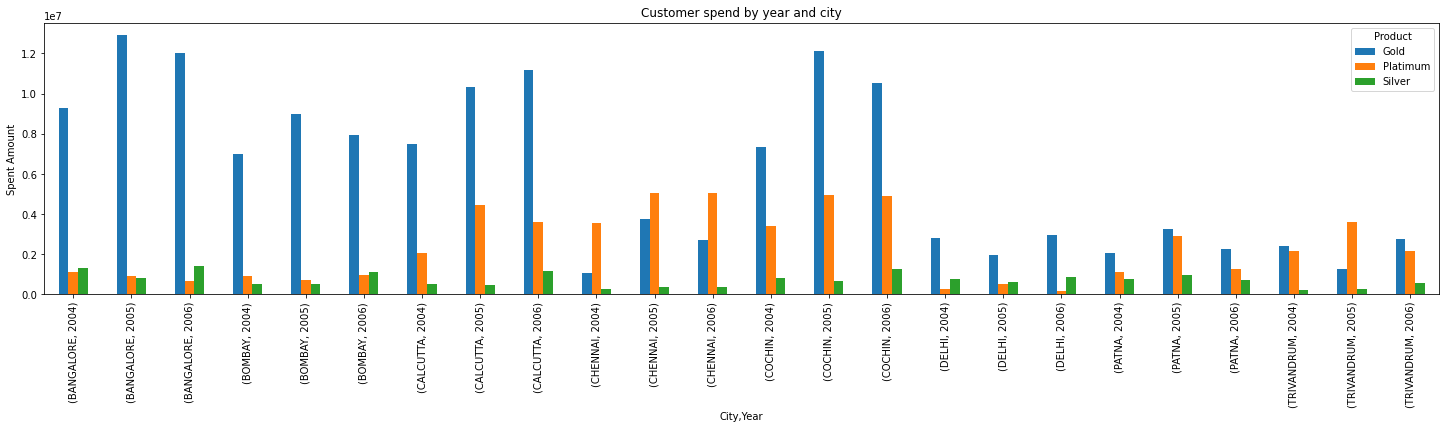

In [138]:
customer_spend_pivot.plot(kind="bar",figsize=(25,5))
plt.ylabel("Spent Amount")
plt.title("Customer spend by year and city")
plt.show()

# 4. Create graphs for


a. Monthly comparison of total spends, city wise

In [139]:
customer_spend['Monthly'] = customer_spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
month_city = customer_spend.groupby(["Monthly","City"])[["Amount"]].sum().sort_index().reset_index()
month_city =pd.pivot_table(data=customer_spend,values='Amount',index='City',columns='Monthly',aggfunc='sum')
month_city

Monthly,April,August,December,February,January,July,June,March,May,November,October,September
City,,,,,,,,,,,,
BANGALORE,4207980.48,695061.95,422167.24,6734494.76,9041796.84,2228217.69,1330685.90,5362903.07,6383115.13,2260603.07,1091602.61,703018.28
BOMBAY,1873785.01,1066744.75,140040.71,4276988.30,5948993.33,177726.32,1172594.97,5227850.50,3891945.60,2872049.40,676005.70,1278402.79
CALCUTTA,3457507.95,1548354.02,55001.50,8150545.61,9064864.90,2234573.27,2293045.81,4939040.04,5578246.87,2078880.93,196357.83,1511713.57
CHENNAI,2518656.99,305875.97,223628.27,4385815.95,4466961.36,693825.77,1244242.16,3183643.71,2856199.62,1347779.28,156247.17,745759.40
COCHIN,3882744.94,2317306.61,909533.05,5747886.38,11714373.54,1290897.30,2495745.07,5645146.53,6581085.69,3127999.60,868551.89,1382242.90
DELHI,777240.75,155402.16,842342.02,1494064.06,2714261.45,50001.50,511276.09,2267149.02,1600322.07,391610.96,64615.46,50001.00
PATNA,2338179.53,419383.64,50000.00,2353333.55,4916205.55,50000.00,746186.13,1437166.61,2136586.80,413677.87,329537.34,70329.95
TRIVANDRUM,1199293.45,453773.94,640922.26,2857123.89,3704336.99,260484.50,400336.83,2392316.51,2813534.48,143387.40,285581.92,186063.70


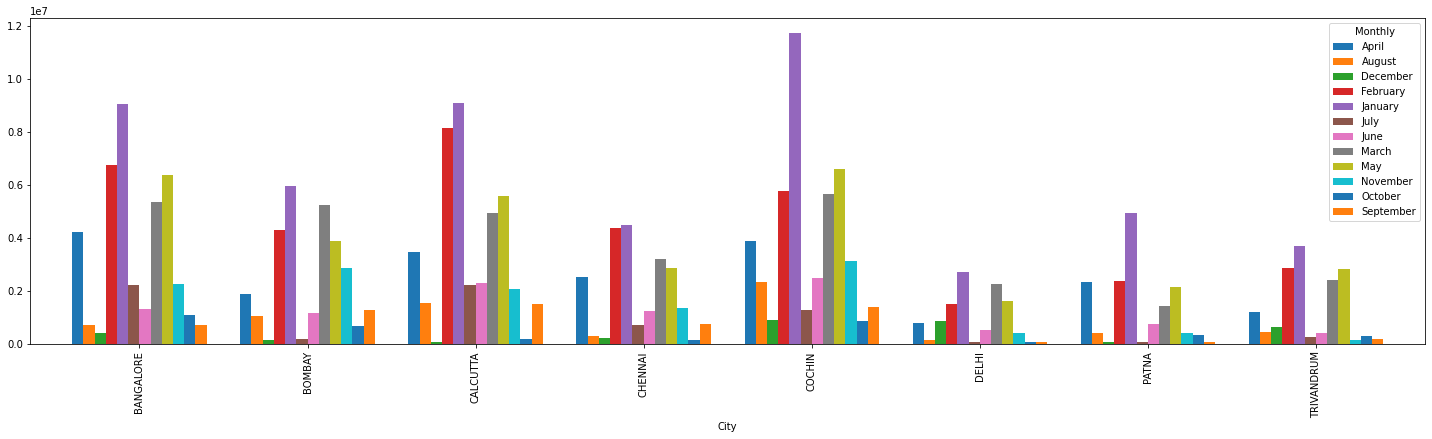

In [140]:
month_city.plot(kind="bar",figsize=(25,6),width=0.8)
plt.show()

b. Comparison of yearly spend on air tickets

In [141]:
air_tickets = customer_spend.groupby(["Year","Type"])[["Amount"]].sum().reset_index()
filtered = air_tickets.loc[air_tickets["Type"]=="AIR TICKET"]
filtered

,Year,Type,Amount
0,2004,AIR TICKET,4357225.35
15,2005,AIR TICKET,10550152.21
30,2006,AIR TICKET,5248469.56


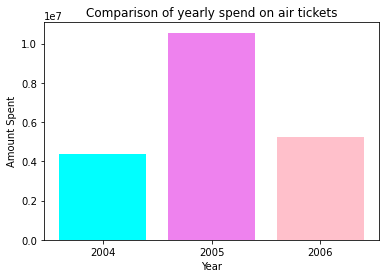

In [142]:
plt.bar(filtered["Year"],height=filtered["Amount"], color = ['cyan', 'violet', 'pink'])
plt.xlabel("Year")
plt.ylabel("Amount Spent")
plt.title("Comparison of yearly spend on air tickets")
plt.show()

c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [143]:
prod_wise = pd.pivot_table(data=customer_spend,index='Product',columns='Monthly',values='Amount',aggfunc='sum')
prod_wise

Monthly,April,August,December,February,January,July,June,March,May,November,October,September
Product,,,,,,,,,,,,
Gold,13170572.59,4954030.42,2332940.96,24779179.55,32413831.83,5167416.37,6538862.64,19256972.48,21548169.76,9203267.46,3018223.38,3816887.62
Platimum,5182493.86,1714762.80,750156.19,9134054.58,14951578.51,1288156.26,2965712.71,7288837.68,8151926.49,2741618.42,550275.04,1667840.84
Silver,1902322.65,293109.82,200537.90,2087018.37,4206383.62,530153.72,689537.61,3909405.83,2140940.01,691102.63,100001.50,442803.13


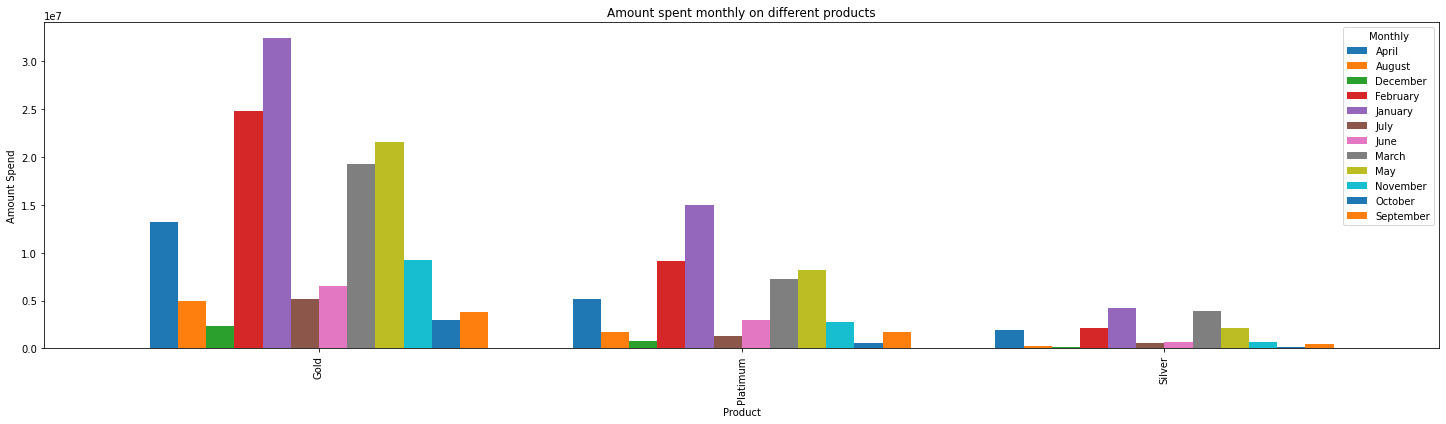

In [144]:
prod_wise.plot(kind="bar",figsize=(25,6),width=0.8)
plt.ylabel("Amount Spend")
plt.title("Amount spent monthly on different products")
plt.show()

# (5) Write user defined PYTHON function to perform the following analysis: You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [145]:
# converting 'Month' column to date time format
customer_repay['Month'] = pd.to_datetime(customer_repay['Month'])
#creating new column "Monthly" and "Yearly" using already existing 'Month' column
customer_repay['Monthly'] = customer_repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
customer_repay['Yearly'] = customer_repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))
def summary_report(product,timeperiod):
    print('Give the product name and timeperiod for which you want the data')
    if product.lower()=='gold' and timeperiod.lower()=='monthly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='gold' and timeperiod.lower()=='yearly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='silver' and timeperiod.lower()=='monthly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='silver' and timeperiod.lower()=='yearly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    if product.lower()=='platinum' and timeperiod.lower()=='monthly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Platinum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='platinum' and timeperiod.lower()=='yearly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Platinum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    return result

In [146]:
summary_report('gold','monthly')

Give the product name and timeperiod for which you want the data


Monthly                           April     August   December    February  \
Product City       Customer                                                 
Gold    BANGALORE  A1         508949.16        NaN        NaN   781873.80   
                   A13        494392.40  873304.51        NaN  2049808.15   
                   A14        812582.20  198623.13  388821.96  1482923.34   
                   A30        425694.16        NaN        NaN  1321469.80   
                   A43        612541.80        NaN        NaN   763846.93   
                   A63              NaN        NaN        NaN         NaN   
                   A81              NaN        NaN        NaN         NaN   
                   A88              NaN        NaN        NaN         NaN   
                   A92        459105.69        NaN        NaN         NaN   
        COCHIN     A11        958466.08  332677.61        NaN  1069789.26   
                   A16        338710.86        NaN        NaN   331143.85   
                   A32        333042.82   99528.43        NaN   851127.91   
                   A45       1435443.21  431769.44  410935.52  1241580.90   
                   A61       3412860.60  197804.13        NaN  1345911.54   
                   A65              NaN        NaN        NaN         NaN   
                   A90        109931.32        NaN        NaN         NaN   
                   A94              NaN        NaN        NaN         NaN   
        CALCUTTA   A10        478747.41        NaN        NaN   652033.51   
                   A15              NaN   17981.25        NaN   516544.51   
                   A29              NaN  534103.41        NaN   627147.67   
                   A31         13054.67        NaN        NaN   962656.24   
                   A60       2397565.91  735660.40        NaN  1403731.08   
                   A89        497237.97        NaN        NaN         NaN   
        BOMBAY     A12        601326.07  120471.17        NaN  1978117.59   
                   A17        391463.29   98341.04  479227.30   374865.01   
                   A42        173199.87        NaN        NaN   476213.23   
                   A62       1115760.01        NaN        NaN   478764.07   
                   A91        247781.00        NaN        NaN         NaN   
        CHENNAI    A27        379529.81  472123.57  136860.63   841114.02   
                   A67              NaN        NaN        NaN         NaN   
        TRIVANDRUM A28        115326.71  437823.07  451630.26   968709.79   
        PATNA      A26        558432.60  398164.37  417177.67  1298000.32   
                   A66              NaN        NaN        NaN         NaN   
                   A95              NaN        NaN        NaN         NaN   
        DELHI      A44        346650.76  539494.72   79696.21   745752.19   
                   A64              NaN        NaN  212614.48         NaN   
                   A82              NaN        NaN        NaN         NaN   
                   A93              NaN        NaN        NaN         NaN   

Monthly                         January        July       June       March  \
Product City       Customer                                                  
Gold    BANGALORE  A1        2407806.29   297176.74        NaN         NaN   
                   A13       2014186.98   424603.55  837101.91  1183569.05   
                   A14        993114.87    41962.19   41128.98  1682886.51   
                   A30        608066.49         NaN   72609.24   599331.38   
                   A43       1978038.15   803935.53   23525.91  1378774.72   
                   A63        372179.26         NaN        NaN         NaN   
                   A81              NaN         NaN        NaN   207780.32   
                   A88              NaN         NaN        NaN   146821.30   
                   A92              NaN         NaN        NaN         NaN   
        COCHIN     A11        958556.39   128484.37        Na